## Credit Card Fraud Detection - Dealing with Imbalanced Classes in Data

[Reference ](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)

- Imbalanced classes are a common problem in classification due to disproportionate ratio of observations in *each class*
- `Class imbalance` can be found in many different areas including medical diagnosis, spam filtering, and fraud detection
- Most machine learning algorithms work best when the number of samples in each class are about equal
    - This is because most algorithms are designed to maximize accuracy and reduce error
    
In this problem we look at **a few ways to handle imbalanced class problem using Credit Card Data**. 

**Objective:** To correctly classify the minority class of fraudulent transactions.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Runtime Configuration Parameters for Matplotlib
plt.rcParams['font.family'] = 'Verdana'
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd drive/

/content/drive


In [7]:
cd MyDrive/credit-card-fraud-detection/

/content/drive/MyDrive/credit-card-fraud-detection


In [8]:
# Read data
credit_card_df = pd.read_csv('creditcard.csv')
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Data types
credit_card_df.shape

(284807, 31)

In [10]:
# Missing values
def missing_values(df):
    total_null = df.isna().sum()
    percent_null = df.isna().sum() / df.count()
    missing_data = pd.concat([total_null, percent_null], axis = 1, 
                             keys = ['Total missing values', 'Percentage missing values']).sort_values('Total missing values')
    return missing_data

missing_values(credit_card_df)

,Total missing values,Percentage missing values
Time,0,0.0
V28,0,0.0
V27,0,0.0
V26,0,0.0
V25,0,0.0
V24,0,0.0
V23,0,0.0
V22,0,0.0
V21,0,0.0
V20,0,0.0


In [11]:
print('Class count:')
print(credit_card_df.Class.value_counts())

Class count:
0    284315
1       492
Name: Class, dtype: int64


##### NOTE: Difference between sns.catplot and sns.countplot
- Countplot
    - Shows count of observations in each categorical bin using bars
- Catplot
    - Provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations

- [Add count values on bars](https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/)

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


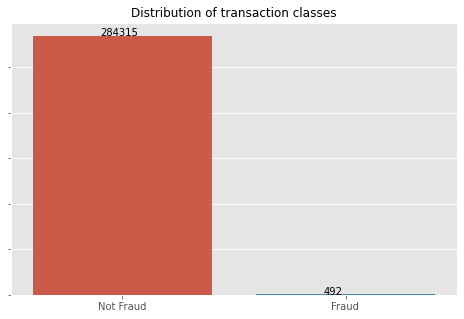

In [12]:
# Plot the class count
fig, ax = plt.subplots(figsize=(8,5))
class_count = sns.countplot(x = 'Class', data = credit_card_df)
class_count.set_xticklabels(['Not Fraud', 'Fraud'])
class_count.set_yticklabels([]) # To disable all value markings on y-axis

# Function to show values on bars
for p in class_count.patches:
    class_count.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ 0.30, p.get_height()))
    
# Cleaning up the plot
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of transaction classes', fontsize = 12)
plt.show()

In [13]:
# Percentage of each minor class (FRAUD)
len(credit_card_df.loc[credit_card_df.Class==1]) / credit_card_df.shape[0] *100

0.1727485630620034

- From the above plot we can see that the dataset is highly imbalanced with only **0.17%** of target class(FRAUD)
- This is a problem because many machine learning models are designed to maximize overall accuracy, which especially with imbalanced classes may not be the best metric to use
- Classification accuracy is defined as the number of correct predictions divided by total predictions times 100
- For example, if we simply predicted all transactions are not fraud, we would get a classification acuracy score of over 99%!

#### Train-Test split

In [14]:
from sklearn.model_selection import train_test_split

# Separating input and target
y = credit_card_df.Class
X = credit_card_df.drop('Class', axis = 1) # Drop target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#### Baseline model with Dummy Classifier with imbalanced data

In [15]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

In [16]:
# Dummy Classifier
dummy = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
dummy_predictions = dummy.predict(X_test)

# Results
print('Unique predicted labels: ', np.unique(dummy_predictions))

# Accuracy
print('Accuracy score: ', accuracy_score(y_test, dummy_predictions))

Unique predicted labels:  [0]
Accuracy score:  0.9984129659279234


- As predicted our accuracy score (using Dummy classifier) for classifying all transactions as NOT FRAUD is 99.8%

- As per the above results, the Dummy Classifier predicts only Class 0, and hence is clearly not a good option for our objective of correctly classifying fraudulent transactions

#### Logistic regression on imbalanced dataset

In [17]:
from sklearn.linear_model import LogisticRegression

lr_imbalanced = LogisticRegression().fit(X_train, y_train)
lr_imbalanced_pred = lr_imbalanced.predict(X_test)

# Results
print('Unique predicted labels: ', np.unique(lr_imbalanced_pred))

# Check accuracy
print('Accuracy score: ', accuracy_score(y_test, lr_imbalanced_pred))

Unique predicted labels:  [0 1]
Accuracy score:  0.9987640796606837


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [18]:
# Checking count of predicted values
preds = pd.DataFrame(lr_imbalanced_pred)
preds[0].value_counts()

0    71093
1      109
Name: 0, dtype: int64

`Logistic regression outperformed Dummy Classifier on imbalanced dataset`, where it predicted 94 instances of class 1.

The accuracy score decreased as compared to the dummy classifier above. This tells us that either we did something wrong in our logistic regression model, or that *accuracy* might not be our best option for measuring performance.

#### Change the performance metric

Accuracy can be very misleading and is not the best metric to use when evaluating imbalanced datasets. 

[Metrics](https://medium.com/towards-data-science/how-to-best-evaluate-a-classification-model-2edb12bcc587) that can provide better insights:

**1. Confusion matrix:**
Table showing correct predictions and types of incorrect predictions. It is used to calculate precision and recall.
- True positive (TP): Predicting positive class as positive (ok)
- False positive (FP): Predicting negative class as positive (not ok) ==> Type I error
- False negative (FN): Predicting positive class as negative (not ok) ==> Type II error
- True negative (TN): Predicting negative class as negative (ok)

`TRICK TO REMEMBER:`
- Second word is what the model predicts.
- First word indicates whether the prediction is correct.

**2. Precision:**

$Precision = TP / (TP +FP)$

- The focus of precision is `positive predictions`
- Measures how good the model is at correctly predicting positive classes (PREDICTED positive classes)
- *It indicates how many positive predictions are true*
- e.g. for an email spam detection model, we try to maximize precision because we want to be correct when an email is predicted (detected) as spam, we do not want to label a normal email as spam (i.e. false positive)

**3. Recall:**

$Recall = TP / (TP + FN)$

- Measures how good the model is at **correctly** predicting positive classes (ACUTAL positive classes)
- *It indicates how many of the positive classes the model is able to predict correctly*
- e.g. for a tumor detection task, we need to *maximize recall* because we want to detect positive classes as much as possible

**4. F-1 score:**

$F-1score = 2 * (Precision * Recall) / (Precision + Recall)$

- Harmonic mean of Precision and Recall
- More useful measure than accuracy for problems with uneven class distribution
    - It takes into account both false positive and false negatives
- Ranges from [0,1]

**5. Sensitivity (True-positive rate (TPR)):**
- Proportion of positive classes that is correctly predicted (from ACTUAL classes) as positive

**6. Specificity:**

$False-positive-rate(FPR) = 1 - Specificity$

- Measures proportion of negative classes that is correctly predicted (from ACTUAL classes) as negative


##### Applying f-1 score and recall score to the logistic regression model on imbalanced dataset

In [19]:
# F1-score
print('F-1 score for logistic regression on imbalanced data: ', f1_score(y_test, lr_imbalanced_pred))

# Recall
print('Recall for logistic regression on imbalanced data: ', recall_score(y_test, lr_imbalanced_pred))

F-1 score for logistic regression on imbalanced data:  0.6036036036036037
Recall for logistic regression on imbalanced data:  0.5929203539823009


We get an unimpressive score on the model. 

### Resampling techniques

#### 1. Oversampling minority class

- Defined as adding more copies of the minority class
- It works well if you don't have a lot of data to work with

**NOTE:**
- It's important to split into test and train sets BEFORE resampling techniques
- Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets
- This can cause the model to remember certain data points and lead to overfitting and poor generalization to test data

In [20]:
# Separating input and target
y = credit_card_df.Class
X = credit_card_df.drop('Class', axis = 1)

In [21]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [22]:
# Putting together X_train and y_train as a training dataframe
X = pd.concat([X_train, y_train], axis = 1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
83225,59741.0,-1.648591,1.228130,1.370169,-1.735542,-0.029455,-0.484129,0.918645,-0.438750,0.982144,...,-0.218076,-0.203458,-0.213015,0.011372,-0.304481,0.632063,-0.262968,-0.099863,38.42,0
52800,45648.0,-0.234775,-0.493269,1.236728,-2.338793,-1.176733,0.885733,-1.960981,-2.363412,-2.694774,...,-1.495358,-0.083066,0.074612,-0.347329,0.541900,-0.433294,0.089293,0.212029,61.20,0
21293,31579.0,1.134626,-0.774460,-0.163390,-0.533358,-0.604555,-0.244482,-0.212682,0.040782,-1.136627,...,-0.684454,-1.855269,0.171997,-0.387783,-0.062985,0.245118,-0.061178,0.012180,110.95,0
133600,80455.0,0.069514,1.017753,1.033117,1.384376,0.223233,-0.310845,0.597287,-0.127658,-0.701533,...,0.097023,0.369957,-0.219266,-0.124941,-0.049749,-0.112946,0.114440,0.066101,10.00,0
38225,39302.0,-0.199441,0.610092,-0.114437,0.256565,2.290752,4.008475,-0.123530,1.038374,-0.075846,...,-0.019733,0.165463,-0.080978,1.020656,-0.300730,-0.269595,0.481769,0.254114,22.00,0


In [23]:
# Separating minority and majority classes
not_fraud = X[X.Class == 0]
fraud = X[X.Class == 1]

In [24]:
# Oversampling minority class

# Import library
from sklearn.utils import resample

# Upsample
fraud_upsampled = resample(fraud, # The dataframe to resample
                          replace = True, # Sample with replacement
                          n_samples = len(not_fraud), # Resample to same number of observations as from not_fraud
                          random_state = 42) # For reproducibility

# Combining majority and upsampled minority dataframes
upsampled = pd.concat([not_fraud, fraud_upsampled])

# Check class count
upsampled.Class.value_counts()

0    213226
1    213226
Name: Class, dtype: int64

##### Logistic regression with balanced dataset (after oversampled minority class data)

In [25]:
# Trying logistic regression again with the balanced dataset
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis = 1)

upsampled_lr = LogisticRegression().fit(X_train, y_train)
upsampled_preds = upsampled_lr.predict(X_test)

In [26]:
# Accuracy
print('Accuracy: ', accuracy_score(y_test, upsampled_preds))

# Recall
print('Recall: ', recall_score(y_test, upsampled_preds))

# F-1 score
print('F-1 score: ', f1_score(y_test, upsampled_preds))

# Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, upsampled_preds))

Accuracy:  0.9562090952501334
Recall:  0.911504424778761
F-1 score:  0.06197352587244284


,0,1
0,67981,3108
1,10,103


- Accuracy score decreased after upsampling, but the model is now predicting both classes more equally
- Recall score increased, but F1 is much lower than with either our baseline logistic regression

#### 2. Undersampling majority class
- Undersampling can be defined as removing some observations of the majority class
- Undersampling can be a good choice when you have an enormous dataset with millions of rows
- **Disadvantage**: 
    - May lead to removal of valuable information
    - Could lead to underfitting and poor generalization to test data

In [27]:
# Downsample
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # Sample without replacement to reduce size
                                n_samples = len(fraud), # Resample to match same size as the minority clas
                                random_state = 42) # For reproducibility

# Combining downsampled majority and minority dataframes
downsampled = pd.concat([not_fraud_downsampled, fraud])

# Check class count
downsampled.Class.value_counts()

0    379
1    379
Name: Class, dtype: int64

##### Logistic regression with balanced dataset (after undersampling majority class data)

In [28]:
# Trying logistic regression again with the balanced dataset
y_train = downsampled.Class
X_train = downsampled.drop('Class', axis = 1)

downsampled_lr = LogisticRegression().fit(X_train, y_train)
downsampled_preds = downsampled_lr.predict(X_test)

In [29]:
# Accuracy
print('Accuracy: ', accuracy_score(y_test, downsampled_preds))

# Recall
print('Recall: ', recall_score(y_test, downsampled_preds))

# F-1 score
print('F-1 score: ', f1_score(y_test, downsampled_preds))

# Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, downsampled_preds))

Accuracy:  0.9458161287604281
Recall:  0.9203539823008849
F-1 score:  0.05115592720118053


,0,1
0,67240,3849
1,9,104


Undersampling *underperformed* oversampling in this case. Let’s try one more method for handling imbalanced data.

#### 3. Generate synthetic samples
- Similar to oversampling
- Creates synthetic samples
- **[SMOTE](https://towardsdatascience.com/how-to-effortlessly-handle-class-imbalance-with-python-and-smote-9b715ca8e5a7): Synthetic Minority Oversamoling Technique**
- SMOTE uses a nearest neighbours algorithm to generate new and synthetic data, which is used for training the model
- **NOTE:** It’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data

In [32]:
from imblearn.over_sampling import SMOTE

# Separating input and target
y = credit_card_df.Class
X = credit_card_df.drop('Class', axis = 1) # Drop target variable

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# SMOTE
sm = SMOTE(random_state = 27)
X_train, y_train = sm.fit_resample(X_train, y_train)

##### Logistic regression after synthetic data generation with SMOTE

In [34]:
# Trying logistic regression again with the balanced dataset after SMOTE
smote_lr = LogisticRegression().fit(X_train, y_train)
smote_preds = smote_lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [35]:
# Accuracy
print('Accuracy: ', accuracy_score(y_test, smote_preds))

# Recall
print('Recall: ', recall_score(y_test, smote_preds))

# F-1 score
print('F-1 score: ', f1_score(y_test, smote_preds))

# Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, smote_preds))

Accuracy:  0.9831605853768153
Recall:  0.9026548672566371
F-1 score:  0.14540270848182466


,0,1
0,69901,1188
1,11,102


The F1-score is increased and recall is similar to the upsampled model above and for our data here outperforms undersampling.

#### Conclusion

It appears for this particular dataset **SMOTE** and **oversampling** are among the best of the options we have tried here.

These are just some of the many possible methods to try when dealing with imbalanced datasets. 
- Oversample minority class
- Undersample majority class
- Generate synthetic samples

Also try using different evaluation metrics for better results. Some others methods to consider are collecting more data or choosing different resampling ratios. 